# MODELO PREDITO - FRAUDE BANCÁRIA

O objetivo desta análise preditiva é determinar se determinada transação bancária tem potencial ou não de ser uma fraude. Dessa forma, o modelo auxilia em alertas sobre transações suspeitas e que podem impedir algum tipo de dano ao cliente e ao banco em si. O objetivo desse modelo é ter uma acurácia acima de 80%.

In [1]:
# carregando os pacotes e removendo os avisos
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carregando o dataset
base = pd.read_csv('C:/python_scripts/fraud/base.csv')

In [3]:
# Conferindo a quantidade de linhas e confirmando que a junção dos dataset está correta
print(base.shape)

(1000000, 32)


## 1. Análise Exploratória

Dataset possui 1 milhão de registros com 32 atributos. Como é um problema de classificação, é esperado que exista um desbalanceamento de classes e também possíveis atributos que estejam correlacionados. A fase de análise exploratória será excelente para identificar esses pontos e determinar quais serão os passos no pré-processamento.

In [4]:
# Visualizando os dados
base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


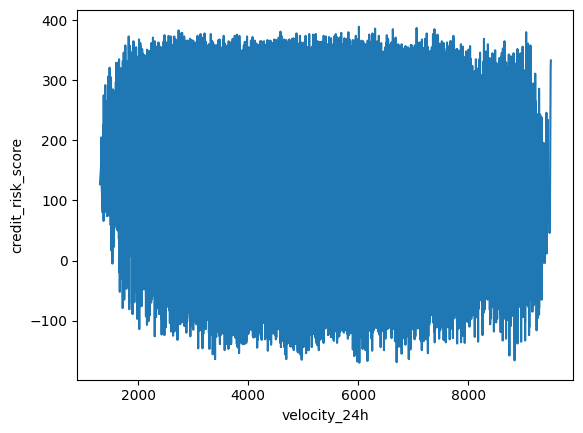

In [33]:
# Gráfico de dispersão
sns.lineplot(x ='velocity_24h', y ='credit_risk_score',
            data = base);

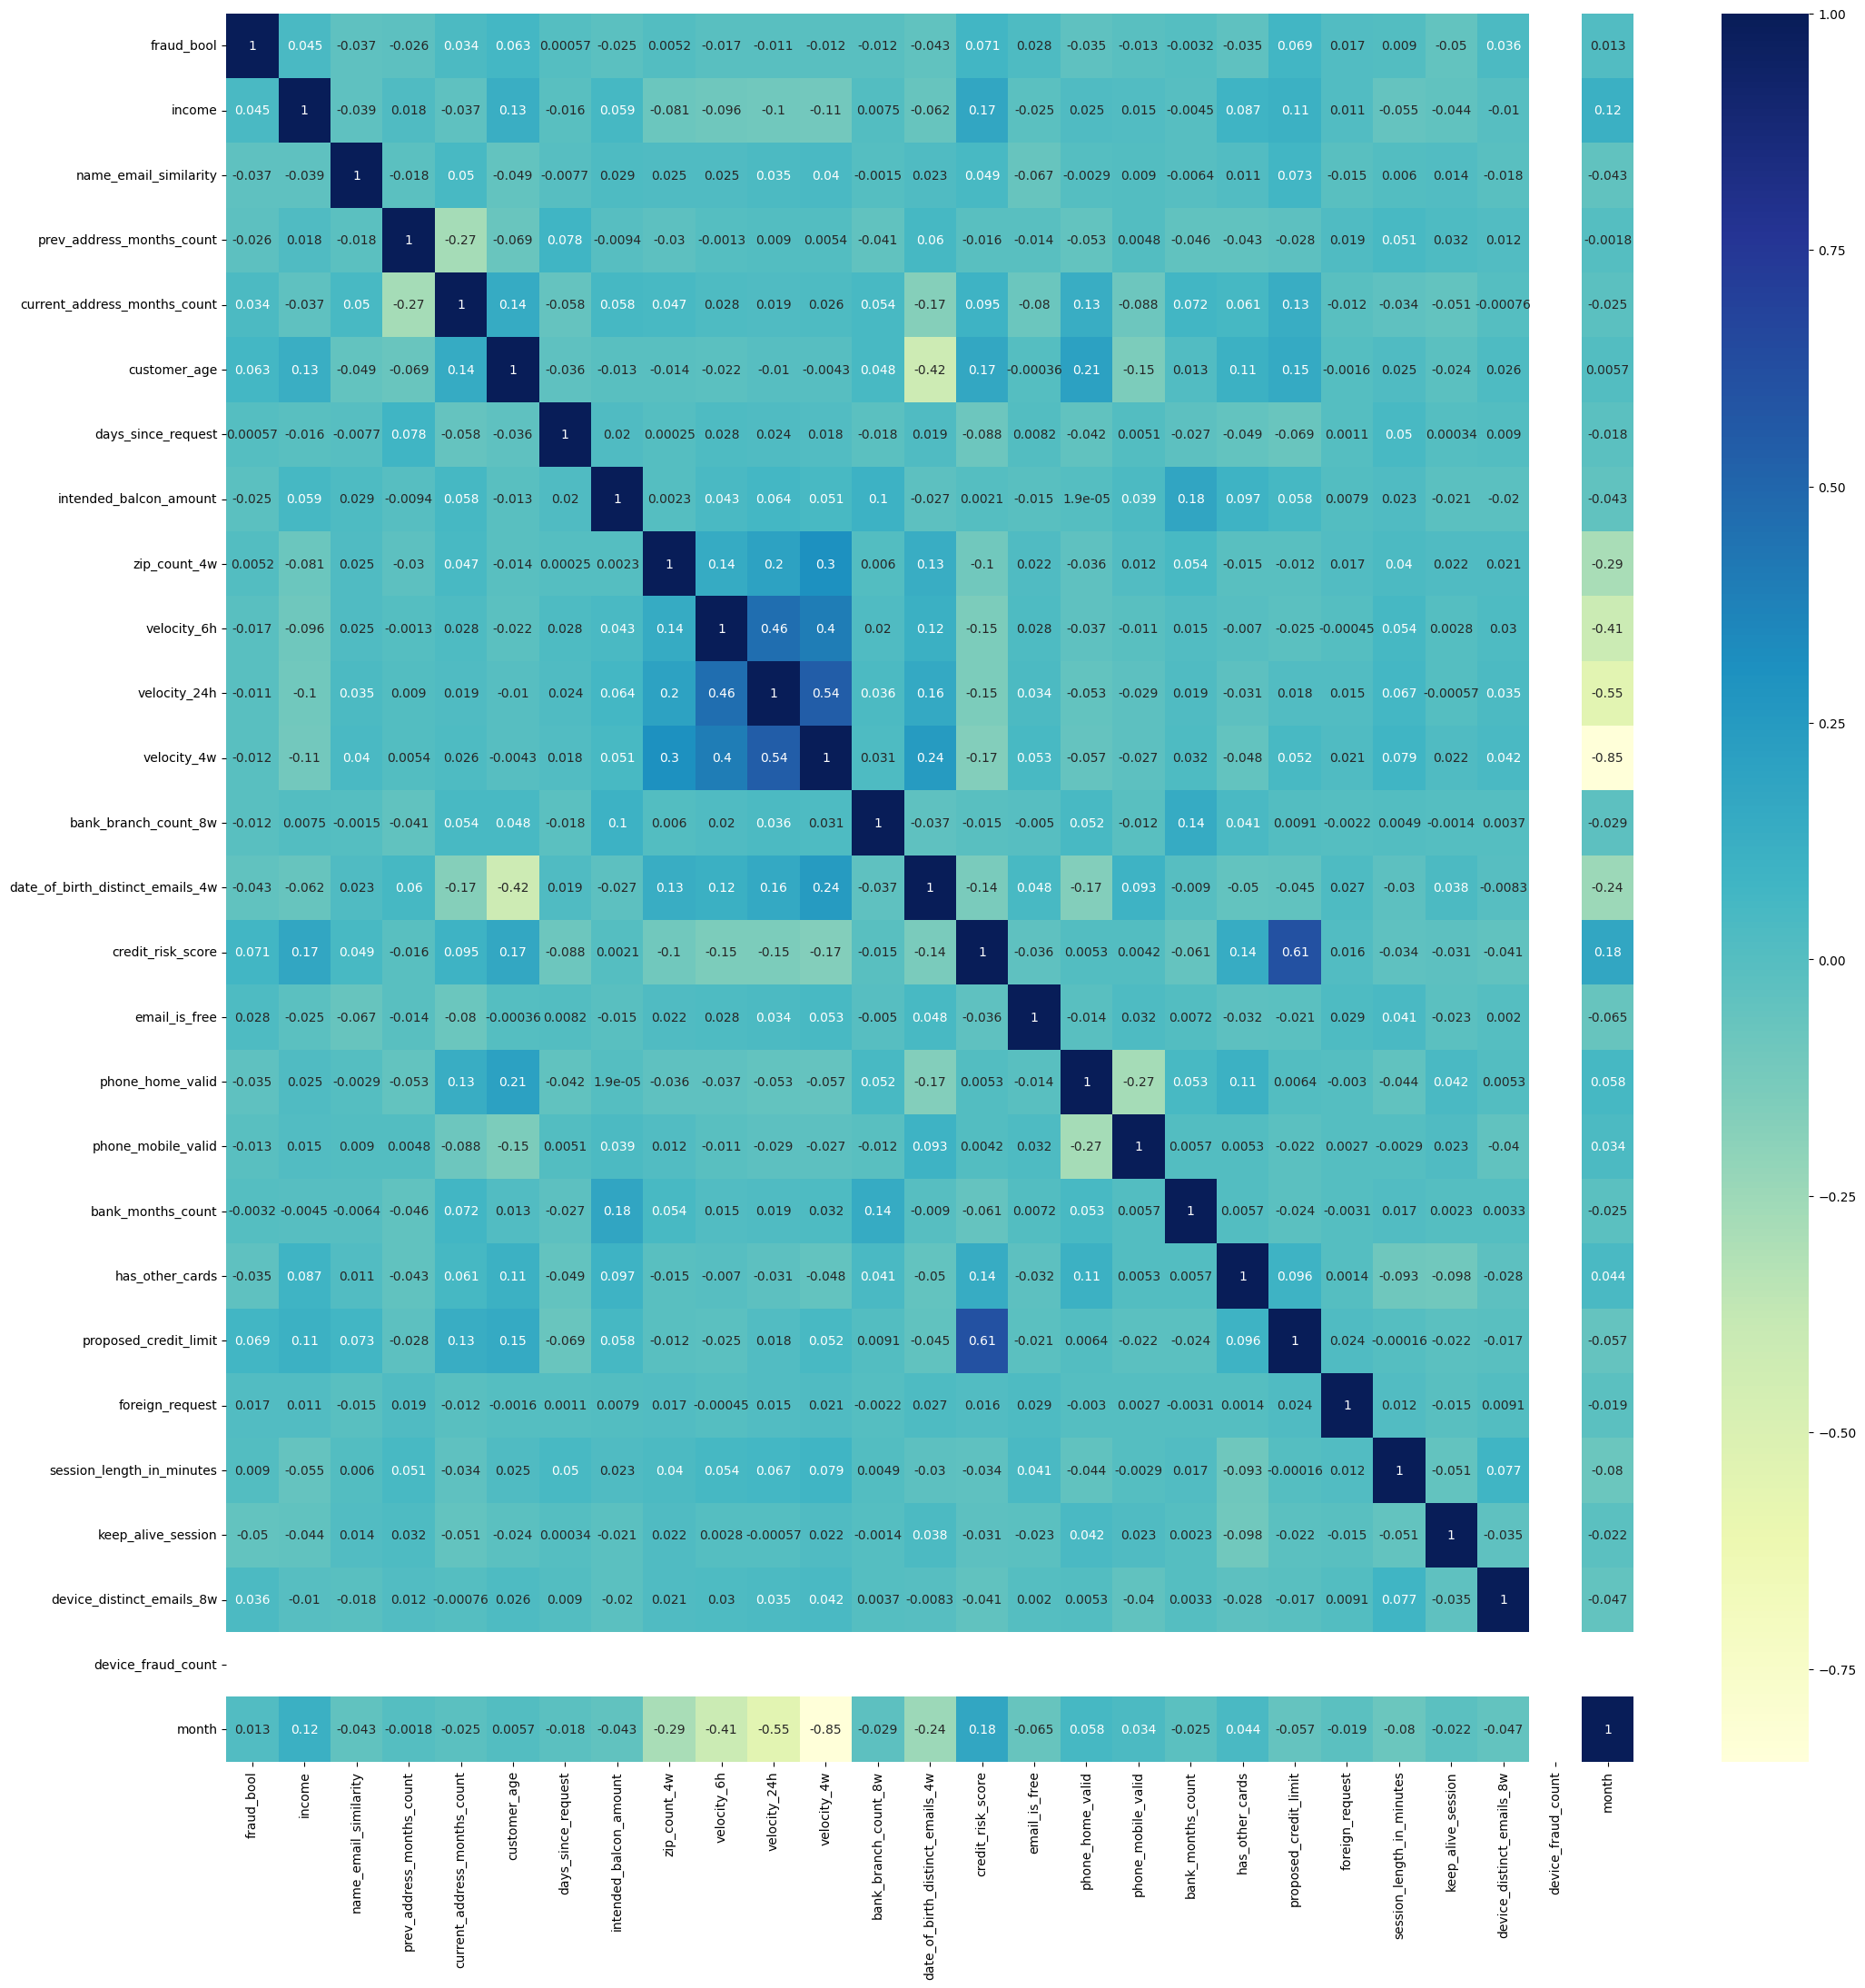

In [25]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(25, 25))
dataplot = sns.heatmap(base.corr(), cmap="YlGnBu", annot=True)